In [ ]:
!pip install vk
import vk
token =   # Сервисный ключ доступа
session = vk.Session(access_token=token)  # Авторизация
vk_api = vk.API(session)
personal_token =   # Персональный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=personal_token)  # Авторизация
vk_personal_api = vk.API(session)  # Авторизация

In [ ]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data
members=get_members("trita.plenka")


In [ ]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] # находим айди участника
            first_name = member["first_name"] # находим имя учатника
            last_name = member["last_name"] # находим фамилию учатника
            
            sex = member["sex"] # находим пол учатника (1 или 2)
            if int(sex) == 1:  # если пол это 1 
                sex = "F"  # обозначем женский пол как F
            elif int(sex) == 2:  # если пол это 2 
                sex = "M" # обозначем мужской пол как F
            else:  # если есть другой какой-то пол
                sex = "-"  # скорее всего нет, поэтому ставим прочерк
                
            bdate = member.get('bdate', "-")   # находим день рождения учатника
            if len(bdate.split(".")) == 3:  # нам нужен только год, если он есть
                bdate = bdate.split(".")[-1]  # то сохраняем год
            else:  # если год не указан, то возраст участника мы не узнаем
                bdate = "-"  # поэтому прочерк
                
            city = member.get('city', {}).get("title", "-")  # находим город участника
            country = member.get('country', {}).get("title", "-")  # находим страну участника
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
save_members_to_file("tritaplenka_members.txt", members)

In [ ]:
from google.colab import files


files.download("tritaplenka_members.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

df = pd.read_csv("tritaplenka_members.txt", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [ ]:
df.head(10)

,id,name,surname,sex,birth,city,country
0,"348,",Galina,Rumyantseva,F,-,-,-
1,"479,",Viktoria,Statsevich,F,1989,Saint Petersburg,Russia
2,"734,",Dmitry,Dyuzhev,M,1989,Moscow,Russia
3,"832,",Anton,Spartakov,M,1986,Saint Petersburg,Russia
4,"882,",Anna,Golikova,F,-,Saint Petersburg,Russia
5,"985,",Maria,Pavlova,F,-,-,-
6,"1018,",Yarik,Samoylov,M,-,Moscow,Russia
7,"1025,",Alexandra,Podzorov,F,-,-,-
8,"1097,",Ksenia,Zakharova,F,-,Saint Petersburg,Russia
9,"1131,",Alyona,Skolkova,F,-,-,-


In [ ]:
city_count = df['city'].value_counts().drop('-')
city_count = city_count[:30]
print(city_count)

Moscow                     28319
Saint Petersburg           22326
Kyiv                        5473
Minsk                       4132
Yekaterinburg               2668
Novosibirsk                 2056
Krasnodar                   1804
Nizhny Novgorod             1671
Kazan                       1588
Rostov-on-Don               1550
Kharkiv                     1509
Voronezh                    1480
Samara                      1290
Odessa                      1240
Krasnoyarsk                 1202
Perm                        1104
Chelyabinsk                 1028
Ufa                          901
Lviv                         896
Vladivostok                  853
Volgograd                    852
Kaliningrad                  825
Tyumen                       823
Omsk                         803
Almaty                       785
Tomsk                        744
Saratov                      652
Irkutsk                      649
Yaroslavl                    638
Dnipropetrovsk (Dnipro)      621
Name: city

In [ ]:
birth_count = df['birth'].value_counts().drop('-')
birth_count = birth_count[:30]
print(birth_count)

1998    6249
1997    6058
1996    5716
1999    5289
1995    5200
2000    4541
1994    4296
1993    3484
2001    3177
1992    2913
1991    2380
1990    2252
2002    2086
1989    1677
1988    1452
2003    1073
1987    1061
1986     916
2004     739
1985     662
1984     505
1983     382
1902     357
1982     321
1980     306
1981     263
1979     184
1905     176
1978     168
1977     154
Name: birth, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


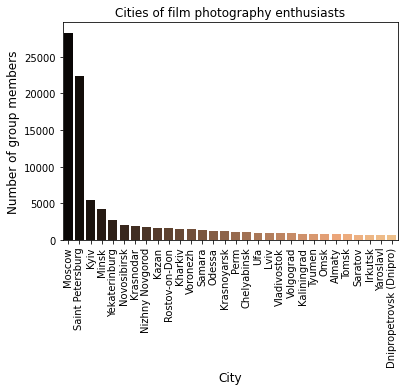

In [ ]:
sns.barplot(city_count.index, city_count.values, palette='copper') # рисуем график, выбираем цвет
plt.title('Cities of film photography enthusiasts')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


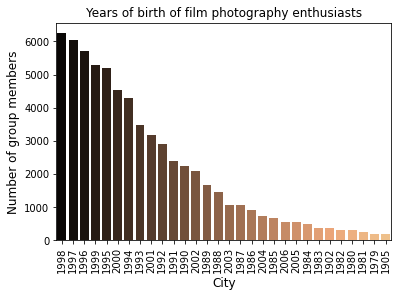

In [ ]:
sns.barplot(birth_count.index, birth_count.values, palette='copper') # рисуем график, выбираем цвет
plt.title('Years of birth of film photography enthusiasts')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

In [ ]:
sex_count = df['sex'].value_counts().drop('-')
sex_count = sex_count[:30]
print(sex_count)

F    154084
M     79442
Name: sex, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


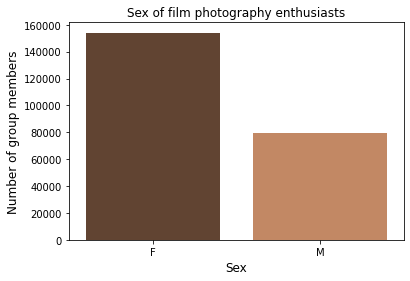

In [ ]:
sns.barplot(sex_count.index, sex_count.values, palette='copper') # рисуем график, выбираем цвет
plt.title('Sex of film photography enthusiasts')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.show() # показываем изображение


In [ ]:
new_df = df[df['sex'].ne('-')] # оставлем тех, кто указал свой пол
new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') # оставлем тех, кто указал свой возраст

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


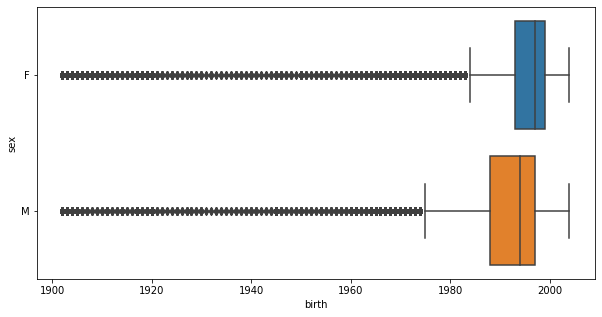

In [ ]:
plt.figure(figsize=(10,5)) # размер графика
sns.boxplot(x="birth", y="sex", data=new_df) # строим график
plt.show()